# Load the dataset

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Load the dataset 
file_path = 'AICourses/CCPP_data.csv'  # Replace with the actual path to your file
df = pd.read_csv(file_path)
print(df.head())
print("Shape of the Dataset: {}".format(df.shape))

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90
Shape of the Dataset: (9568, 5)


In [3]:
# Separate input features from the target 
X = df.drop("PE", axis=1).values
y = df["PE"].values

# Split the dataset into train set, cross validation and test set

In [4]:
# 60% for training set, put the remaining 40% in temp vars X_and y_
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.50, random_state=1)

# Delete temp vars X_ and y_
del X_, y_

print(f"the shape of the training set (input) is: {X_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {X_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {X_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (5740, 4)
the shape of the training set (target) is: (5740,)

the shape of the cross validation set (input) is: (1914, 4)
the shape of the cross validation set (target) is: (1914,)

the shape of the test set (input) is: (1914, 4)
the shape of the test set (target) is: (1914,)


# Fit a linear model

## Feature Scaling

In [5]:
# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_scaled = scaler_linear.fit_transform(X_train)

print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze()}")
print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze()}")

Computed mean of the training set: [  19.67207143   54.40489199 1013.2856777    73.25630488]
Computed standard deviation of the training set: [ 7.45372735 12.6884619   5.98016707 14.71527369]


## Train the model

In [6]:
# Initialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

## Evaluate the model

Use of the following formula to calculate the MSE for training and cross validation sets

$$J_{train}(\vec{w}, b) = \frac{1}{2m_{train}}\left[\sum_{i=1}^{m_{train}}(f_{\vec{w},b}(\vec{x}_{train}^{(i)}) - y_{train}^{(i)})^2\right]$$

In [7]:
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(X_train_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

training MSE (using sklearn function): 10.569948141372015


### Scale the cross validation set

In [8]:
# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_scaled = scaler_linear.transform(X_cv)

print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze()}")
print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze()}")

# Feed the scaled cross validation set
yhat = linear_model.predict(X_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Mean used to scale the CV set: [  19.67207143   54.40489199 1013.2856777    73.25630488]
Standard deviation used to scale the CV set: [ 7.45372735 12.6884619   5.98016707 14.71527369]
Cross validation MSE: 9.990908259144481


# Adding polynomial features

## Create additional features

In [9]:
# Instantiate the class to make polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Compute the number of features and transform the training set
X_train_mapped = poly.fit_transform(X_train)

print(X_train_mapped[:5])

[[1.78900000e+01 4.47800000e+01 1.01003000e+03 5.37800000e+01
  3.20052100e+02 8.01114200e+02 1.80694367e+04 9.62124200e+02
  2.00524840e+03 4.52291434e+04 2.40826840e+03 1.02016060e+06
  5.43194134e+04 2.89228840e+03]
 [1.03700000e+01 4.00300000e+01 1.01747000e+03 9.04700000e+01
  1.07536900e+02 4.15111100e+02 1.05511639e+04 9.38173900e+02
  1.60240090e+03 4.07293241e+04 3.62151410e+03 1.03524520e+06
  9.20505109e+04 8.18482090e+03]
 [6.67000000e+00 3.93300000e+01 1.01107000e+03 9.19600000e+01
  4.44889000e+01 2.62331100e+02 6.74383690e+03 6.13373200e+02
  1.54684890e+03 3.97653831e+04 3.61678680e+03 1.02226254e+06
  9.29779972e+04 8.45664160e+03]
 [8.37000000e+00 4.09200000e+01 1.02182000e+03 8.60300000e+01
  7.00569000e+01 3.42500400e+02 8.55263340e+03 7.20071100e+02
  1.67444640e+03 4.18128744e+04 3.52034760e+03 1.04411611e+06
  8.79071746e+04 7.40116090e+03]
 [3.38000000e+00 4.13100000e+01 9.98790000e+02 9.77600000e+01
  1.14244000e+01 1.39627800e+02 3.37591020e+03 3.30428800e+02


## Scale the inputs to narrow down range of values

In [10]:
# Instantiate the class
scaler_poly = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

# Preview the first 5 elements of the scaled training set.
print(X_train_mapped_scaled[:5])

[[-0.2390846  -0.75855467 -0.5444125  -1.3235435  -0.42166766 -0.55049932
  -0.2456401  -0.88493922 -0.78821997 -0.77596816 -1.44636049 -0.54604253
  -1.33218044 -1.29681578]
 [-1.24797581 -1.13291052  0.6996999   1.16978423 -1.15320612 -1.15942559
  -1.24863682 -0.93552564 -1.07283883 -1.12985084 -0.29065527  0.69762358
   1.19122585  1.25394985]
 [-1.74437175 -1.18807875 -0.37050431  1.27103957 -1.37023547 -1.40043856
  -1.75656419 -1.62155064 -1.11208729 -1.20565878 -0.29515837 -0.37274549
   1.25325492  1.38495536]
 [-1.51629794 -1.06276806  1.42710433  0.86805692 -1.28222306 -1.27397017
  -1.51525651 -1.39618959 -1.02193741 -1.04463638 -0.38702376  1.42899545
   0.91412496  0.87626053]
 [-2.18576166 -1.03203147 -2.42395865  1.66518786 -1.48405299 -1.59400504
  -2.20587209 -2.21916921 -0.9992796  -1.08811533  0.10652151 -2.40760381
   1.56515794  1.91528772]]


## Train the model and measure model performance

In [11]:
# Initialize the class
model = LinearRegression()

# Train the model
model.fit(X_train_mapped_scaled, y_train )

# Compute the training MSE
yhat = model.predict(X_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_train, yhat) / 2}")

# Add the polynomial features to the cross validation set
X_cv_mapped = poly.transform(X_cv)

# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

# Compute the cross validation MSE
yhat = model.predict(X_cv_mapped_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Training MSE: 9.175477834371003
Cross validation MSE: 8.659131787399472


## Introduce more polynomial terms to compare performance of MSE

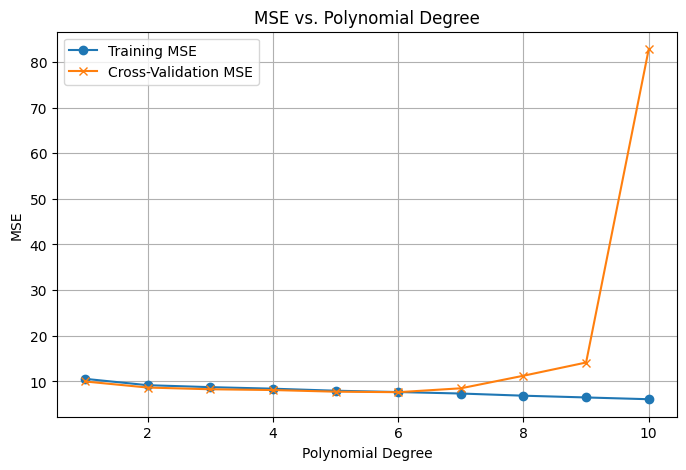

In [12]:
# Initialize lists containing the lists, models, and scalers
train_mses = []
cv_mses = []
models = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):
    
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(X_train)
    
    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train )
    models.append(model)
    
    # Compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)
    
    # Add polynomial features and scale the cross validation set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_cv_mapped = poly.fit_transform(X_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)
    
# Plot the results
degrees=range(1,11)
plt.figure(figsize=(8, 5))  # Adjust figure size as needed

plt.plot(degrees, train_mses, label='Training MSE', marker='o')
plt.plot(degrees, cv_mses, label='Cross-Validation MSE', marker='x')

plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('MSE vs. Polynomial Degree')

plt.legend()
plt.grid(True)
plt.show()

## Choosing the best model

In [13]:
# Get the model with the lowest CV MSE (add 1 because list indices start at 0)
# This also corresponds to the degree of the polynomial added
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=6


## Compute the test set's MSE

In [14]:
# Add polynomial features to the test set
poly = PolynomialFeatures(degree, include_bias=False)
X_test_mapped = poly.fit_transform(X_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# Compute the test MSE
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]}")
print(f"Cross Validation MSE: {cv_mses[degree-1]}")
print(f"Test MSE: {test_mse}")

Training MSE: 7.677341713622295
Cross Validation MSE: 7.644479454276846
Test MSE: 7.928170995905389
